## Examine Results Dataframe

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mp
import matplotlib.pyplot as plt
# force inline plots
%matplotlib inline
plt.style.use('seaborn-deep')
import torch.nn as nn
import copy
import pandas as pd

In [4]:
inference_df = pd.read_csv('data/results/inference_df.csv')
inference_df

,Unnamed: 0,theta,calulated_p,phat,Dicrepancy_percnt
0,0,3.000000,0.199148,4.965052e-04,4.001001e+04
1,1,3.001668,0.198899,4.934131e-04,4.021090e+04
2,2,3.003336,0.198651,4.903402e-04,4.041280e+04
3,3,3.005004,0.198402,4.872853e-04,4.061580e+04
4,4,3.006672,0.198154,4.842505e-04,4.081971e+04
...,...,...,...,...,...
1195,1195,4.993328,0.040653,2.657829e-07,1.529549e+07
1196,1196,4.994996,0.040597,2.641056e-07,1.537125e+07
1197,1197,4.996664,0.040540,2.624375e-07,1.544747e+07
1198,1198,4.998332,0.040484,2.607816e-07,1.552397e+07


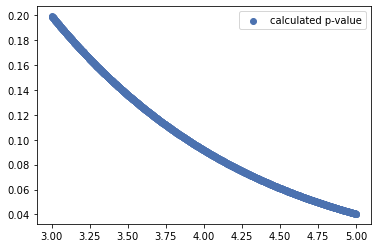

In [7]:
plt.scatter(inference_df.theta, inference_df.calulated_p, label='calculated p-value')
# plt.scatter(inference_df.theta, inference_df.phat, label=r'$\hat{p}$')
plt.legend()

In [26]:
np.sum([st.poisson.pmf(k=N, mu=theta) for N in range(1)])

0.006891715075240962

In [28]:
1-sp.special.gammainc(1+1, theta)

0.04119478098583651

Text(0, 0.5, 'calculated p-value')

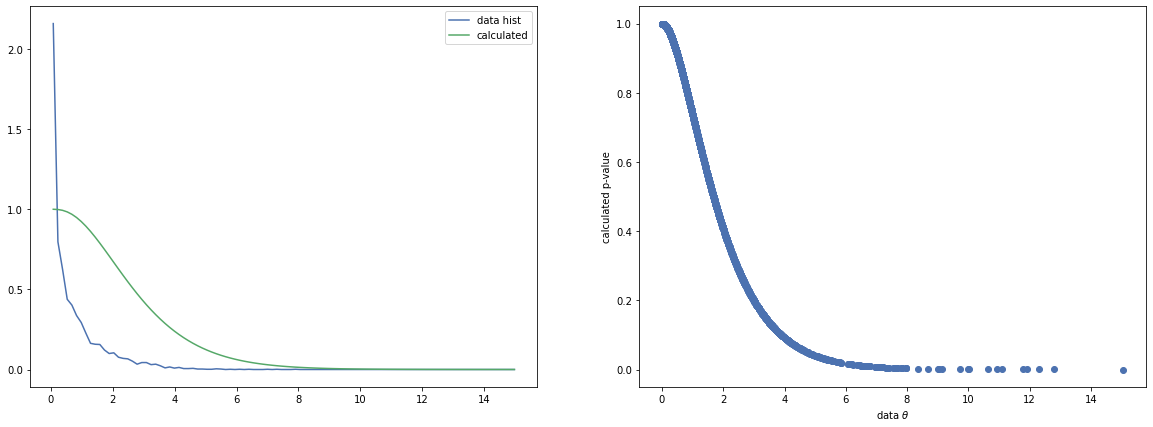

In [52]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
data_df = pd.read_csv('data/UNIFORM_5K_CDFD_eq_3.csv')
hist_counts, b = np.histogram(data_df.theta, density=True, weights=data_df.Z, bins=100)
bin_centers = (b[1:]+b[:-1])/2
calculated_p_value =[]
D=3
for theta in bin_centers:
    # calculated_p_value.append((1-sp.special.gammainc(1+1, theta)))
    p_cal=np.sum([st.poisson.pmf(k=N, mu=theta) for N in range(D)])
    calculated_p_value.append(p_cal)
ax[0].plot(bin_centers, hist_counts, label='data hist')

ax[0].plot(bin_centers, calculated_p_value, label='calculated')
ax[0].legend()
ax[1].scatter(data_df.theta, (1-sp.special.gammainc(1+1, data_df.theta)))
ax[1].set_xlabel(r'data $\theta$'); ax[1].set_ylabel('calculated p-value')